In [ ]:
!git clone http://uit.mpei.ru/git/TroyanovDS/is_dnn.git

Cloning into 'is_dnn'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (186/186), done.
remote: Total 188 (delta 47), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (188/188), 8.53 MiB | 4.57 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/is_dnn/labworks/LW1')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# импорт модулей
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Загрузка датасета
(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = mnist.load_data()

# разбиваем выборку на обучающую и тестовую выборку
X = np.concatenate((X_train_orig, X_test_orig))
y = np.concatenate((y_train_orig, y_test_orig))


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=10000,
    train_size=60000,
    random_state=3,
)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


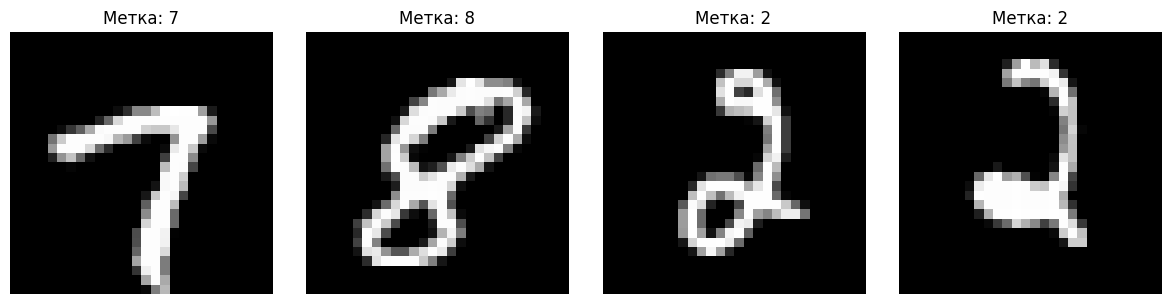

In [ ]:
# Вывод первых 4 изображений
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(f'Метка: {y_train[i]}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# развернем каждое изображение 28*28 в вектор 784
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255
print('Shape of transformed X train:', X_train.shape)

Shape of transformed X train: (60000, 784)


In [ ]:
# переведем метки в one-hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('Shape of transformed y train:', y_train.shape)
num_classes = y_train.shape[1]

Shape of transformed y train: (60000, 10)


In [ ]:
model_0 = Sequential()
model_0.add(Dense(units=num_classes, input_dim=num_pixels, activation='softmax'))

# Компиляция модели
model_0.compile(loss='categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

# Вывод информации об архитектуре
print("Архитектура однослойной сети:")
model_0.summary()

# Обучение модели
history_0 = model_0.fit(X_train, y_train,
                        validation_split=0.1,
                        epochs=50)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Архитектура однослойной сети:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7145 - loss: 1.1468 - val_accuracy: 0.8708 - val_loss: 0.5242
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8769 - loss: 0.4791 - val_accuracy: 0.8838 - val_loss: 0.4376
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8871 - loss: 0.4188 - val_accuracy: 0.8917 - val_loss: 0.4007
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8939 - loss: 0.3855 - val_accuracy: 0.8957 - val_loss: 0.3796
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8987 - loss: 0.3692 - val_accuracy: 0.8993 - val_loss: 0.3665
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9035 - loss: 0.3523 - val_accuracy: 0.9008 - val_loss: 0.3555
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9059 - loss: 0.3402 - val_accuracy: 0.9040 - val_loss: 0.3469
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9053 - loss: 0.3389 - 

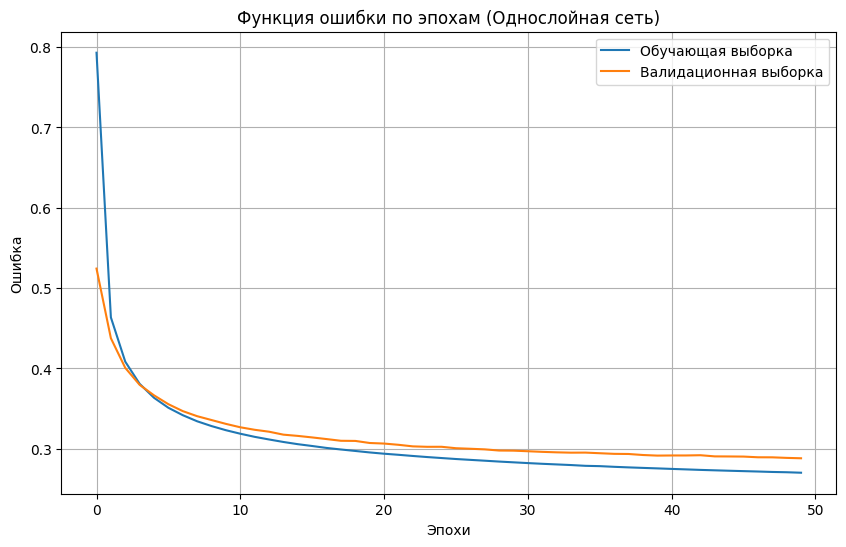

In [ ]:
# График функции ошибки по эпохам
plt.figure(figsize=(10, 6))
plt.plot(history_0.history['loss'], label='Обучающая выборка')
plt.plot(history_0.history['val_loss'], label='Валидационная выборка')
plt.title('Функция ошибки по эпохам (Однослойная сеть)')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Оценка на тестовых данных
scores_0 = model_0.evaluate(X_test, y_test, verbose=0)
print("Результаты однослойной сети:")
print(f"Ошибка на тестовых данных: {scores_0[0]}")
print(f"Точность на тестовых данных: {scores_0[1]}")

Результаты однослойной сети:
Ошибка на тестовых данных: 0.28625616431236267
Точность на тестовых данных: 0.92330002784729


In [ ]:
# Функция для создания и обучения модели
def create_and_train_model(hidden_units, model_name):
    model = Sequential()
    model.add(Dense(units=hidden_units, input_dim=num_pixels, activation='sigmoid'))
    model.add(Dense(units=num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                        validation_split=0.1,
                        epochs=50)

    scores = model.evaluate(X_test, y_test, verbose=0)

    return model, history, scores

In [ ]:
# Эксперименты с разным количеством нейронов
hidden_units_list = [100, 300, 500]
models_1 = {}
histories_1 = {}
scores_1 = {}

In [ ]:
# Обучение сетей с одним скрытым слоем
for units in hidden_units_list:
    print(f"\nОбучение модели с {units} нейронами...")
    model, history, scores = create_and_train_model(units, f"model_{units}")

    models_1[units] = model
    histories_1[units] = history
    scores_1[units] = scores

    print(f"Точность: {scores[1]}")


Обучение модели с 100 нейронами...
Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5548 - loss: 1.8518 - val_accuracy: 0.8210 - val_loss: 0.9619
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8339 - loss: 0.8359 - val_accuracy: 0.8597 - val_loss: 0.6320
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8640 - loss: 0.5853 - val_accuracy: 0.8770 - val_loss: 0.5137
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8797 - loss: 0.4859 - val_accuracy: 0.8847 - val_loss: 0.4522
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8879 - loss: 0.4295 - val_accuracy: 0.8892 - val_loss: 0.4153
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8947 - loss: 0.3969 - val_accuracy: 0.8947 - val_loss: 0.3899
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8974 - loss: 0.3775 - val_accuracy: 0.8967 - val_loss: 0.3729
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step 

In [ ]:
# Выбор наилучшей модели
best_units_1 = max(scores_1.items(), key=lambda x: x[1][1])[0]
print(f"\nНаилучшее количество нейронов: {best_units_1}")
print(f"Точность: {scores_1[best_units_1][1]}")


Наилучшее количество нейронов: 100
Точность: 0.9422000050544739


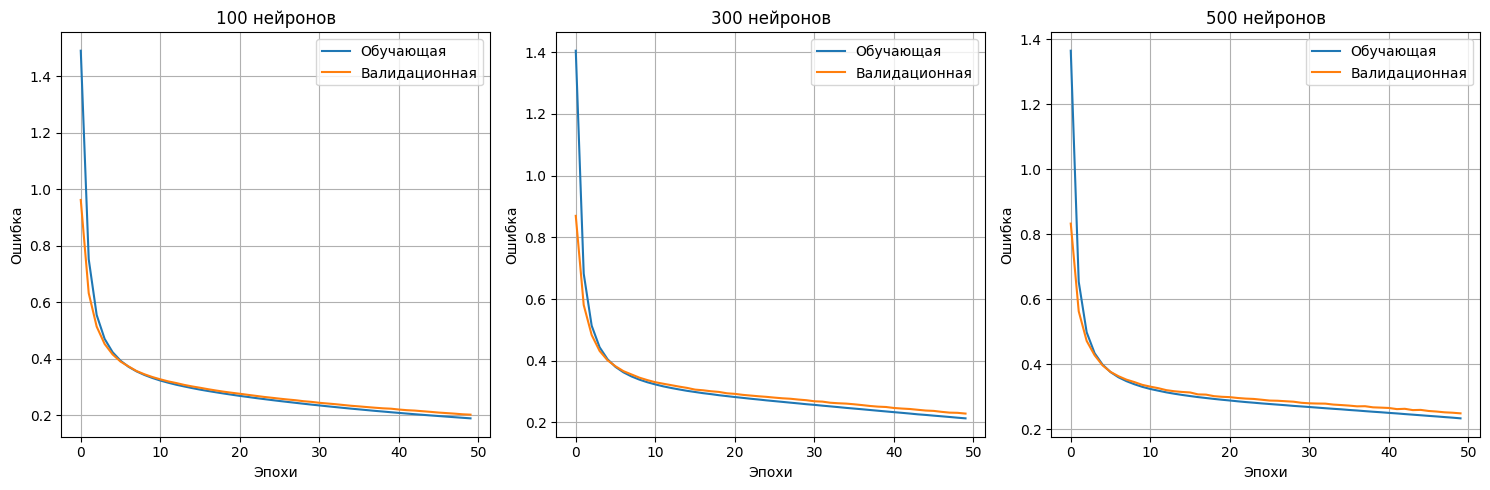

In [ ]:
# Графики ошибок для всех моделей
plt.figure(figsize=(15, 5))
for i, units in enumerate(hidden_units_list, 1):
    plt.subplot(1, 3, i)
    plt.plot(histories_1[units].history['loss'], label='Обучающая')
    plt.plot(histories_1[units].history['val_loss'], label='Валидационная')
    plt.title(f'{units} нейронов')
    plt.xlabel('Эпохи')
    plt.ylabel('Ошибка')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Добавление второго скрытого слоя
second_layer_units = [50, 100]
models_2 = {}
histories_2 = {}
scores_2 = {}

In [ ]:
for units_2 in second_layer_units:
    print(f"\nОбучение модели со вторым слоем {units_2} нейронов")

    model = Sequential()
    model.add(Dense(units=best_units_1, input_dim=num_pixels, activation='sigmoid'))
    model.add(Dense(units=units_2, activation='sigmoid'))
    model.add(Dense(units=num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                        validation_split=0.1,
                        epochs=50)

    scores = model.evaluate(X_test, y_test)

    models_2[units_2] = model
    histories_2[units_2] = history
    scores_2[units_2] = scores

    print(f"Точность: {scores[1]}")


Обучение модели со вторым слоем 50 нейронов
Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2096 - loss: 2.2675 - val_accuracy: 0.5588 - val_loss: 2.0950
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5971 - loss: 1.9743 - val_accuracy: 0.6620 - val_loss: 1.5239
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6823 - loss: 1.3658 - val_accuracy: 0.7380 - val_loss: 1.0431
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7627 - loss: 0.9560 - val_accuracy: 0.7980 - val_loss: 0.8069
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8084 - loss: 0.7568 - val_accuracy: 0.8352 - val_loss: 0.6673
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8369 - loss: 0.6330 - val_accuracy: 0.8543 - val_loss: 0.5793
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8554 - loss: 0.5512 - val_accuracy: 0.8660 - val_loss: 0.5197
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 

In [ ]:
# Выбор наилучшей двухслойной модели
best_units_2 = max(scores_2.items(), key=lambda x: x[1][1])[0]
print(f"\nНаилучшее количество нейронов во втором слое: {best_units_2}")
print(f"Точность: {scores_2[best_units_2][1]:.4f}")


Наилучшее количество нейронов во втором слое: 100
Точность: 0.9423


In [ ]:
# Сбор результатов
results = {
    '0 слоев': {'нейроны_1': '-', 'нейроны_2': '-', 'точность': scores_0[1]},
    '1 слой_100': {'нейроны_1': 100, 'нейроны_2': '-', 'точность': scores_1[100][1]},
    '1 слой_300': {'нейроны_1': 300, 'нейроны_2': '-', 'точность': scores_1[300][1]},
    '1 слой_500': {'нейроны_1': 500, 'нейроны_2': '-', 'точность': scores_1[500][1]},
    '2 слоя_50': {'нейроны_1': best_units_1, 'нейроны_2': 50, 'точность': scores_2[50][1]},
    '2 слоя_100': {'нейроны_1': best_units_1, 'нейроны_2': 100, 'точность': scores_2[100][1]}
}

In [ ]:
# Создаем DataFrame из результатов
df_results = pd.DataFrame([
    {'Кол-во скрытых слоев': 0, 'Нейроны_1_слоя': '-', 'Нейроны_2_слоя': '-', 'Точность': results['0 слоев']['точность']},
    {'Кол-во скрытых слоев': 1, 'Нейроны_1_слоя': 100, 'Нейроны_2_слоя': '-', 'Точность': results['1 слой_100']['точность']},
    {'Кол-во скрытых слоев': 1, 'Нейроны_1_слоя': 300, 'Нейроны_2_слоя': '-', 'Точность': results['1 слой_300']['точность']},
    {'Кол-во скрытых слоев': 1, 'Нейроны_1_слоя': 500, 'Нейроны_2_слоя': '-', 'Точность': results['1 слой_500']['точность']},
    {'Кол-во скрытых слоев': 2, 'Нейроны_1_слоя': best_units_1, 'Нейроны_2_слоя': 50, 'Точность': results['2 слоя_50']['точность']},
    {'Кол-во скрытых слоев': 2, 'Нейроны_1_слоя': best_units_1, 'Нейроны_2_слоя': 100, 'Точность': results['2 слоя_100']['точность']}
])

print(" " * 20 + "ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("=" * 70)
# print(df_results.to_string(index=False, formatters={
#     'Точность': '{:.4f}'.format
# }))
print(df_results.reset_index(drop=True))

                    ТАБЛИЦА РЕЗУЛЬТАТОВ
   Кол-во скрытых слоев Нейроны_1_слоя Нейроны_2_слоя  Точность
0                     0              -              -    0.9233
1                     1            100              -    0.9422
2                     1            300              -    0.9377
3                     1            500              -    0.9312
4                     2            100             50    0.9418
5                     2            100            100    0.9423


In [ ]:
# Выбор наилучшей модели
best_model_type = max(results.items(), key=lambda x: x[1]['точность'])[0]
best_accuracy = results[best_model_type]['точность']
print(f"\nНаилучшая архитектура: {best_model_type}")
print(f"Точность: {best_accuracy:.4f}")


Наилучшая архитектура: 2 слоя_100
Точность: 0.9423


In [ ]:
# Определение наилучшей модели
if '0' in best_model_type:
    best_model = model_0
elif '1' in best_model_type:
    best_neurons = int(best_model_type.split('_')[1])
    best_model = models_1[best_neurons]
else:
    best_neurons_2 = int(best_model_type.split('_')[1])
    best_model = models_2[best_neurons_2]


In [ ]:
# Сохранение модели
best_model.save('best_mnist_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
NN output: [[5.8587279e-06 9.7018647e-01 6.0002012e-03 5.5828933e-03 7.1756593e-05
  7.2469590e-03 3.2864737e-03 3.9730189e-04 6.0582636e-03 1.1638567e-03]]


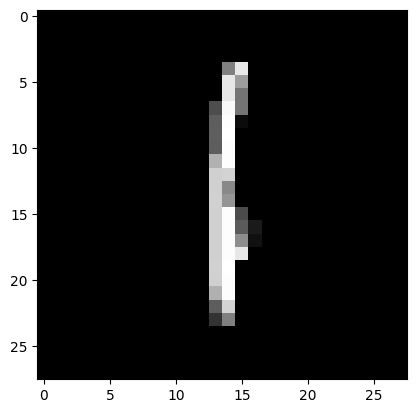

Real mark:  1
NN answer:  1


In [ ]:
# вывод тестового изображения и результата распознавания (1)
n = 123
result = best_model.predict(X_test[n:n+1])
print('NN output:', result)
plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Real mark: ', str(np.argmax(y_test[n])))
print('NN answer: ', str(np.argmax(result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
NN output: [[5.6045882e-02 2.3120556e-06 3.2519495e-01 6.1816531e-01 2.2406326e-08
  2.7827255e-04 7.9103382e-05 1.1205349e-06 2.1714537e-04 1.5997215e-05]]


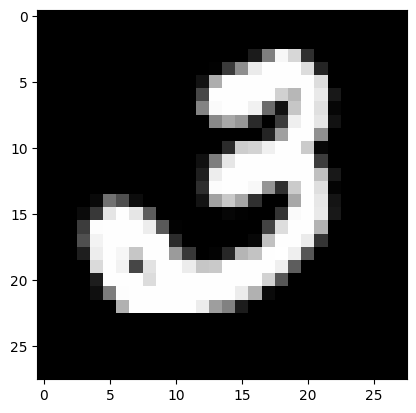

Real mark:  3
NN answer:  3


In [ ]:
# вывод тестового изображения и результата распознавания (3)
n = 353
result = best_model.predict(X_test[n:n+1])
print('NN output:', result)
plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Real mark: ', str(np.argmax(y_test[n])))
print('NN answer: ', str(np.argmax(result)))

In [ ]:
# загрузка собственного изображения (Цифры 2 и 7)
from PIL import Image
file_data_2 = Image.open('2.png')
file_data_7 = Image.open('7.png')
file_data_2 = file_data_2.convert('L') # перевод в градации серого
file_data_7 = file_data_7.convert('L') # перевод в градации серого
test_img_2 = np.array(file_data_2)
test_img_7 = np.array(file_data_7)

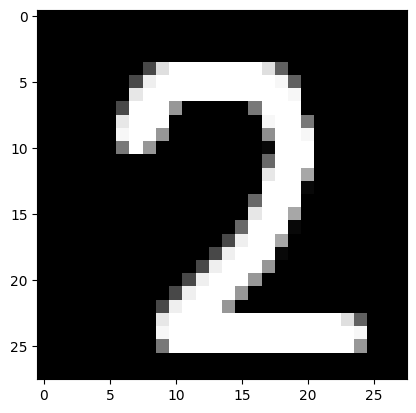

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
I think it's  3


In [ ]:
# вывод собственного изображения (цифра 2)
plt.imshow(test_img_2, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img_2 = test_img_2 / 255
test_img_2 = test_img_2.reshape(1, num_pixels)
# распознавание
result = best_model.predict(test_img_2)
print('I think it\'s ', np.argmax(result))

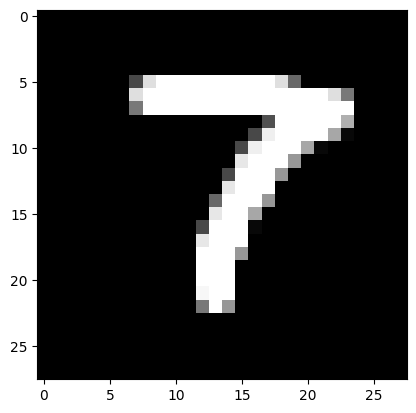

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
I think it's  7


In [ ]:
# вывод собственного изображения (цифра 7)
plt.imshow(test_img_7, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img_7 = test_img_7 / 255
test_img_7 = test_img_7.reshape(1, num_pixels)
# распознавание
result = best_model.predict(test_img_7)
print('I think it\'s ', np.argmax(result))

In [ ]:
# Тестирование на собственных повернутых изображениях
from PIL import Image
file_data_2_90 = Image.open('2_90.png')
file_data_7_90 = Image.open('7_90.png')
file_data_2_90 = file_data_2_90.convert('L') # перевод в градации серого
file_data_7_90 = file_data_7_90.convert('L') # перевод в градации серого
test_img_2_90 = np.array(file_data_2_90)
test_img_7_90= np.array(file_data_7_90)

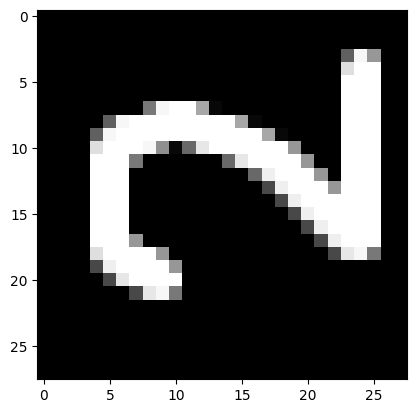

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
I think it's  7


In [ ]:
# вывод собственного изображения (цифра 2)
plt.imshow(test_img_2_90, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img_2_90 = test_img_2_90 / 255
test_img_2_90 = test_img_2_90.reshape(1, num_pixels)
# распознавание
result = best_model.predict(test_img_2_90)
print('I think it\'s ', np.argmax(result))

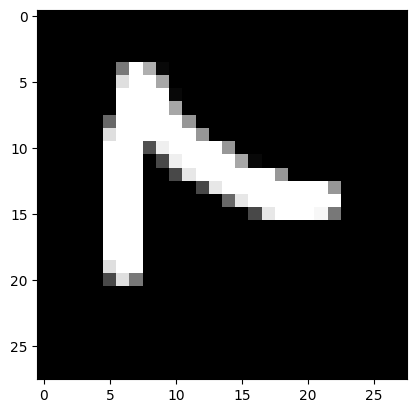

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
I think it's  7


In [ ]:
# вывод собственного изображения (цифра 7)
plt.imshow(test_img_7_90, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img_7_90 = test_img_7_90 / 255
test_img_7_90 = test_img_7_90.reshape(1, num_pixels)
# распознавание
result = best_model.predict(test_img_7_90)
print('I think it\'s ', np.argmax(result))